## **Прогнозирование параметра *title-loading***

Попробовать бустинг

In [ ]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1I916rp6DRANCOo6Ds3att2C1nUoIKKAf" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1I916rp6DRANCOo6Ds3att2C1nUoIKKAf" -o sample.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    270      0 --:--:--  0:00:01 --:--:--   270
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 91.7M    0 91.7M    0     0  36.2M      0 --:--:--  0:00:02 --:--:--  135M


In [ ]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1IgA_3_mFydDPBQT3XgnS_peuQHaP7y2L" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1IgA_3_mFydDPBQT3XgnS_peuQHaP7y2L" -o new_sample.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    255      0 --:--:--  0:00:01 --:--:--   255
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 48.8M    0 48.8M    0     0  21.6M      0 --:--:--  0:00:02 --:--:-- 21.6M


In [ ]:
#!pip3 install -U scipy

In [ ]:
import scipy
scipy.__version__


'1.4.1'

In [ ]:
import pandas as pd
import numpy as np
import scipy
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.signal as ss
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

from lightgbm import LGBMRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!head sample.csv

timestamp,title_loading,current,waterflow,t1,t2,current_s,amper,t3,granula
2020-11-16 00:00:01,282.986114501953,203.854736328125,123.842590332031,8.10185146331787,6.79976844787598,496.624542236328,69.618049621582,1.171875,23.70447889827189
2020-11-16 00:00:03,280.902770996094,459.686920166016,123.842590332031,8.96990776062012,6.07638883590698,478.138000488281,69.2708282470703,1.171875,24.2602137984376
2020-11-16 00:00:05,279.861114501953,637.36865234375,123.408561706543,8.82523155212402,6.07638883590698,494.955596923828,69.4444427490234,1.171875,28.759965260493622
2020-11-16 00:00:07,283.217590332031,566.222229003906,123.553237915039,9.11458301544189,6.07638883590698,506.523529052734,69.0972213745117,1.171875,26.63909941700408
2020-11-16 00:00:09,284.143524169922,429.458892822266,123.697914123535,10.1273145675659,6.07638883590698,513.457946777344,69.0972213745117,1.21527767181396,28.592677714015167
2020-11-16 00:00:11,284.375,332.876739501953,123.263885498047,9.11458301544189,6.0763888

### 1. Загрузка данных

In [ ]:
industry_data = pd.read_csv('sample.csv')
industry_data['timestamp'] = pd.to_datetime(industry_data['timestamp'], format='%Y%m%d %H:%M:%S')
industry_data.head(15)

,timestamp,title_loading,current,waterflow,t1,t2,current_s,amper,t3,granula
0,2020-11-16 00:00:01,282.986115,203.854736,123.842590,8.101851,6.799768,496.624542,69.618050,1.171875,23.704479
1,2020-11-16 00:00:03,280.902771,459.686920,123.842590,8.969908,6.076389,478.138000,69.270828,1.171875,24.260214
2,2020-11-16 00:00:05,279.861115,637.368652,123.408562,8.825232,6.076389,494.955597,69.444443,1.171875,28.759965
3,2020-11-16 00:00:07,283.217590,566.222229,123.553238,9.114583,6.076389,506.523529,69.097221,1.171875,26.639099
4,2020-11-16 00:00:09,284.143524,429.458893,123.697914,10.127315,6.076389,513.457947,69.097221,1.215278,28.592678
5,2020-11-16 00:00:11,284.375000,332.876740,123.263885,9.114583,6.076389,502.059937,68.402779,1.171875,20.730163
6,2020-11-16 00:00:13,286.574066,329.559021,123.987267,9.982639,5.931713,472.791260,67.361107,1.171875,22.919078
7,2020-11-16 00:00:15,286.226837,612.670105,123.408562,9.114583,5.931713,484.226227,67.013885,1.171875,24.634484
8,2020-11-16 00:00:17,285.300934,514.244812,123.408562,10.127315,5.931713,498.344727,67.881943,1.171875,25.425556
9,2020-11-16 00:00:19,283.564819,492.863983,123.842590,8.101851,5.931713,494.148956,67.187500,1.171875,22.142183


In [ ]:
industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574693 entries, 0 to 574692
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   timestamp      574693 non-null  datetime64[ns]
 1   title_loading  574655 non-null  float64       
 2   current        574655 non-null  float64       
 3   waterflow      574655 non-null  float64       
 4   t1             574655 non-null  float64       
 5   t2             574655 non-null  float64       
 6   current_s      574655 non-null  float64       
 7   amper          574655 non-null  float64       
 8   t3             574655 non-null  float64       
 9   granula        574693 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 43.8 MB


Проверка ряда на последовательность (монотонность)

In [ ]:
print(industry_data['timestamp'].is_monotonic)

True


Проверка временного ряда на 

### 2. Изучение и подготовка данных


#### 2.1 Описание временного ряда прогнозируемой величины

In [ ]:
def time_plot(data, time1, time2, x, y):
  plt.figure(figsize=(24, 5))
  data = data.loc[(data[x] > pd.to_datetime(time1)) & (data[x] < pd.to_datetime(time2))]
  plt.plot(data[x], data[y])

  plt.grid(color='black', alpha=0.5)
  plt.title("Временной график", fontsize=22)
  plt.xlabel('Время', fontsize=18)
  plt.ylabel('Значение переменной', fontsize=18)

  #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
  #plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(25))

  #plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
  #plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.2))

  #plt.ylim(0,600)
  
  plt.show()

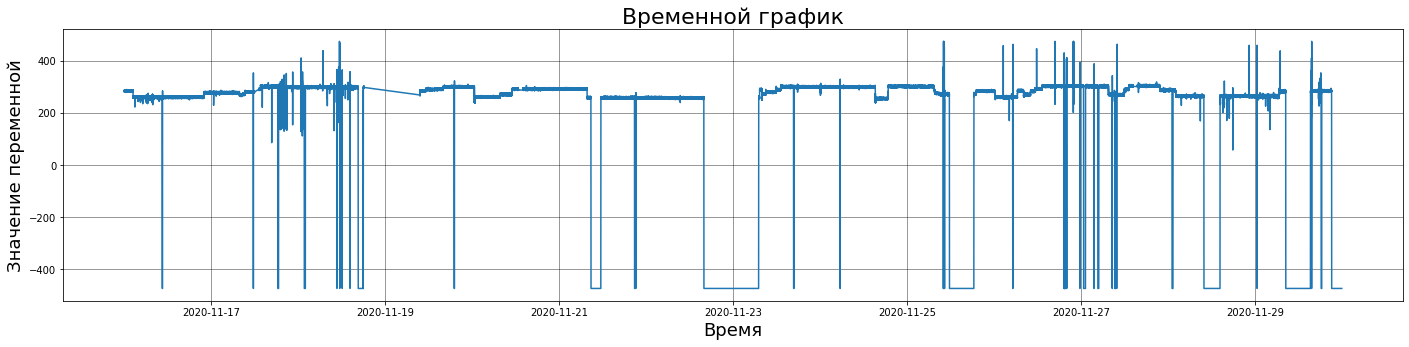

In [ ]:
time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 
#time_plot(industry_data, '2020-11-16 23:30', '2020-11-17 23:30', 'timestamp', 'title_loading')  

In [ ]:
col_list = list(industry_data)[1:]

In [ ]:
col_dict = {}
for i in col_list:
  col_dict[i]  = 'mean'
col_dict['title_loading']  = 'mean'
funcs = col_dict
print(col_dict)

{'title_loading': 'mean', 'current': 'mean', 'waterflow': 'mean', 't1': 'mean', 't2': 'mean', 'current_s': 'mean', 'amper': 'mean', 't3': 'mean', 'granula': 'mean'}


In [ ]:
industry_data = industry_data.set_index(['timestamp'])
industry_data = industry_data.resample('1T').agg(col_dict)
industry_data.reset_index(level=0, inplace=True)
display(industry_data.head())

,timestamp,title_loading,current,waterflow,t1,t2,current_s,amper,t3,granula
0,2020-11-16 00:00:00,283.715275,481.768111,123.591818,9.428048,6.095679,490.432954,67.910877,1.173322,23.666863
1,2020-11-16 00:01:00,284.043206,556.797466,123.668979,9.871721,6.148727,540.862480,68.449071,1.171875,25.001005
2,2020-11-16 00:02:00,283.279316,551.599720,123.712382,10.339506,6.389853,549.941516,68.749998,1.173322,15.847808
3,2020-11-16 00:03:00,282.993824,459.269127,123.678624,10.633681,6.322338,493.759224,68.611109,1.215278,24.700454
4,2020-11-16 00:04:00,284.070210,520.659022,123.717204,10.701196,6.346451,508.608501,68.478007,1.155961,25.244564


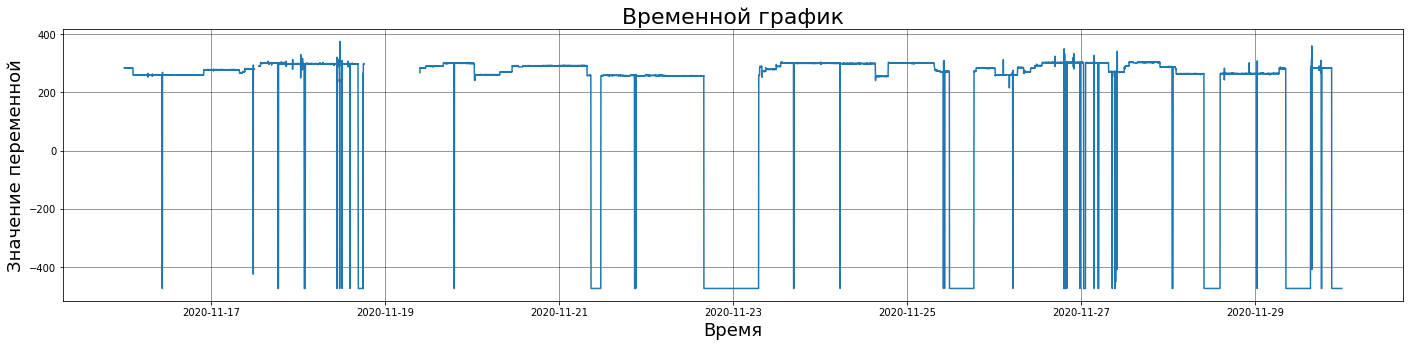

In [ ]:
time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 

График не имеет тренда и сезонности, поэтому предсказывать значения скользящим средним или иным простым способом не будем. 

#### 2.2 Изучение и обработка признаков

Поиск пропущеных значений

In [ ]:
d = {'К-во пропусков': industry_data.isnull().sum(), 'Доля пропусков, %': industry_data.isnull().sum() / len(industry_data) * 100} 
pd.DataFrame(d)

,К-во пропусков,"Доля пропусков, %"
timestamp,0,0.000000
title_loading,996,4.940476
current,996,4.940476
waterflow,996,4.940476
t1,996,4.940476
t2,996,4.940476
current_s,996,4.940476
amper,996,4.940476
t3,996,4.940476
granula,996,4.940476


Пропуска имеются в незначительном количестве и в одних и тех же строках. В целевом признаке пропусков нет, скорее всего, отсутствие данных объясняется сбоем в передаче значений с датчиков. Заменим их предыдущими значениями.

In [ ]:
industry_data = industry_data.ffill(axis = 0)
#display(industry_data.head(15))
industry_data.isnull().sum()

crude_data = industry_data

Поиск выбросов

In [ ]:
def boxplot_data(data, col_list):
  for col in col_list:
    plt.figure(figsize=(8, 8))
    sns.boxplot(y=col, data=data, palette='rainbow')
    plt.title('Распределение значений ' + str(col).title(), fontsize=17)
    plt.grid()
    plt.show()

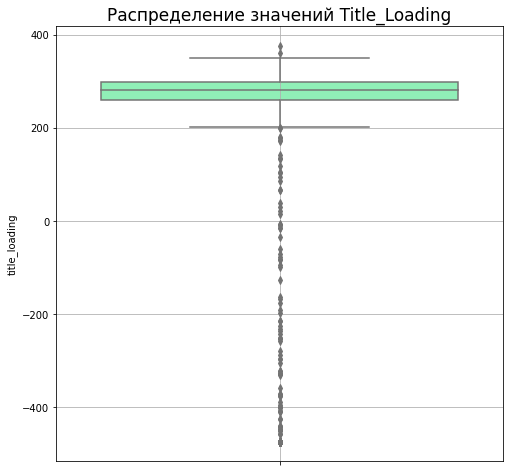

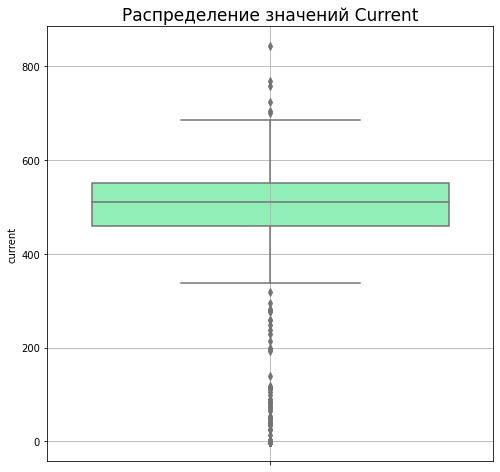

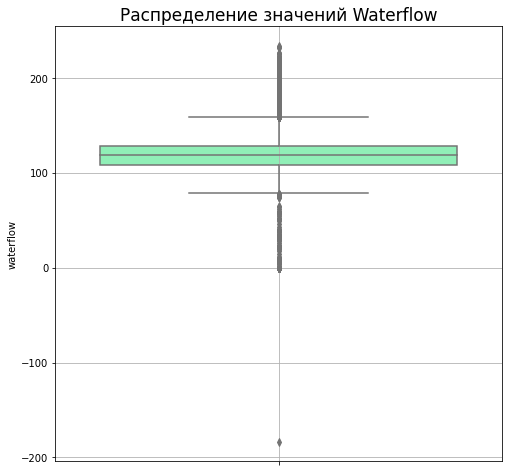

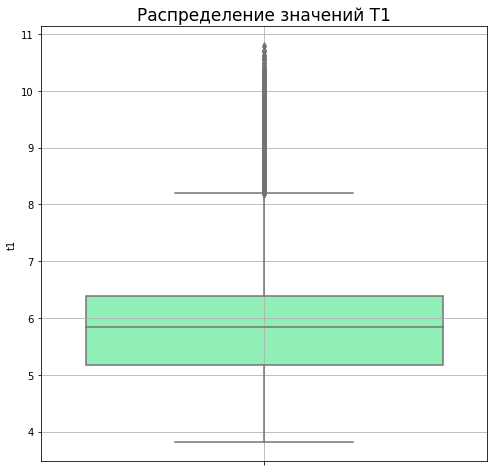

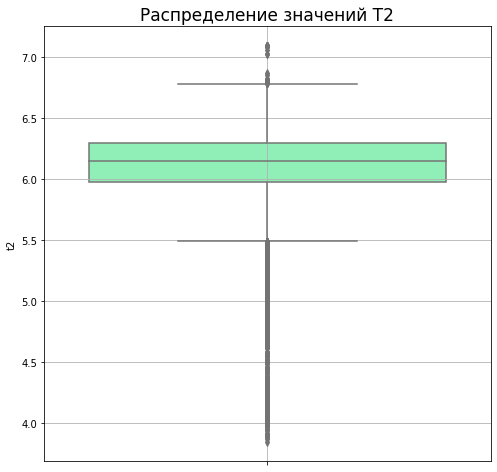

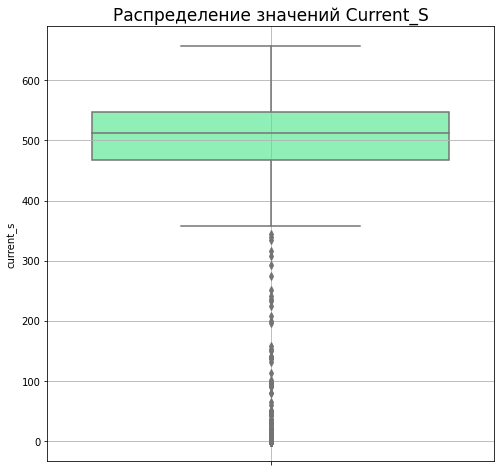

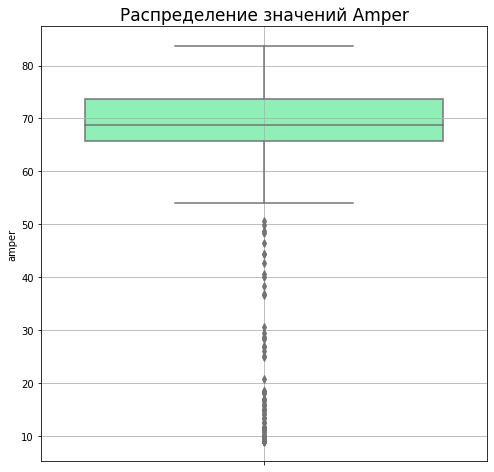

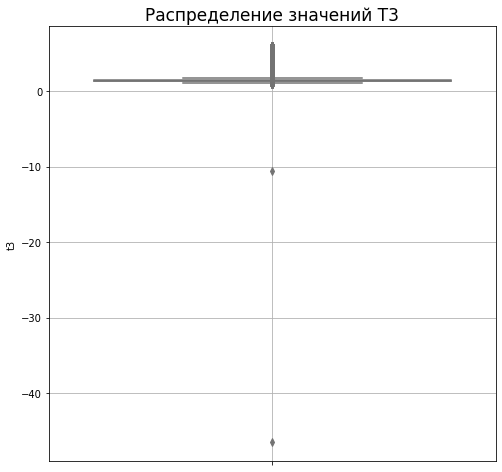

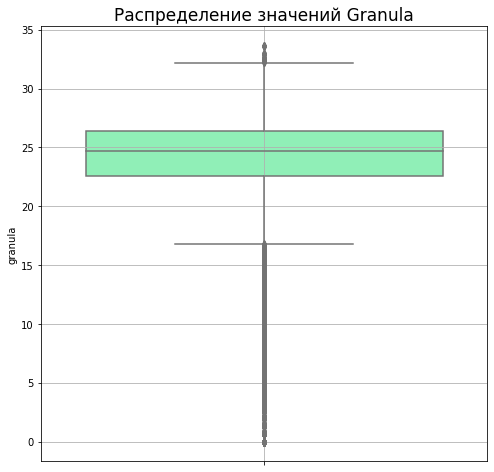

In [ ]:
boxplot_data(industry_data, col_list)

Данные содержат много выбросов. Удалять их нельзя, т.к. нарушится порядок временного ряда. Необходимо заменить их средними значениями. В признаках данные влияние выбросов будет нивелировано функцией RobustScaler.

Целевой признак масштабировать нельзя, выбросы в нём будут заменены.

### 2.3 Изучение и очистка целевых значений

#### Описание целевых значений

Оценка распределения целевого признака

In [ ]:
def dist_plot(data, min, max, x, ax_mod_max, ax_mod_min):

  ax = sns.displot(data=data.loc[(data[x] > min) & (data[x] < max)], x=x, bins=200, kde=True)   
  
  ax.fig.set_figwidth(18)
  ax.fig.set_figheight(10)

  plt.grid(color='black', alpha=1)
  plt.title("Распределение", fontsize=15)
  plt.xlabel('Значения переменной', fontsize=15)
  plt.ylabel('Кол-во', fontsize=15)

  plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ax_mod_max))
  plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(ax_mod_min))

  plt.show()

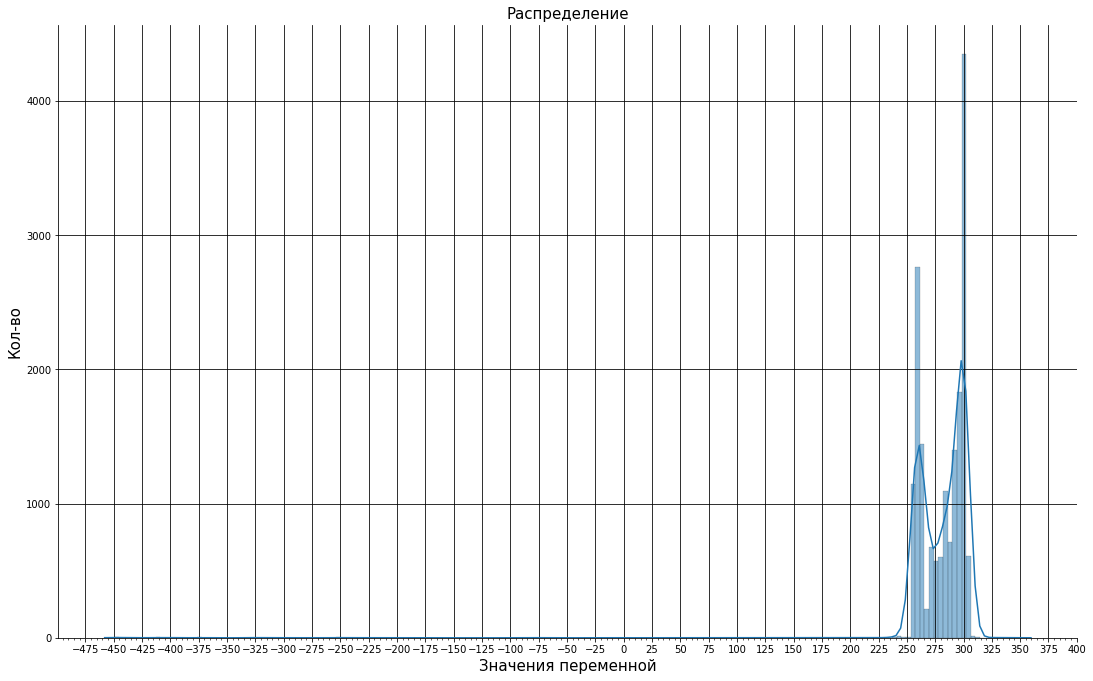

In [ ]:
dist_plot(industry_data, industry_data['title_loading'].min(), industry_data['title_loading'].max(), 'title_loading', 25, 5) 

На графике значения в диапазоне [250, 310] образуют что-то похожее на нормальное распределение. Из этого следует, что можно применять статистические методы. 

Ярко видны выбросы, образующие длинные хвосты - они немногочислены относительно значений из "колокола" и имеют очень подозрительные значения.

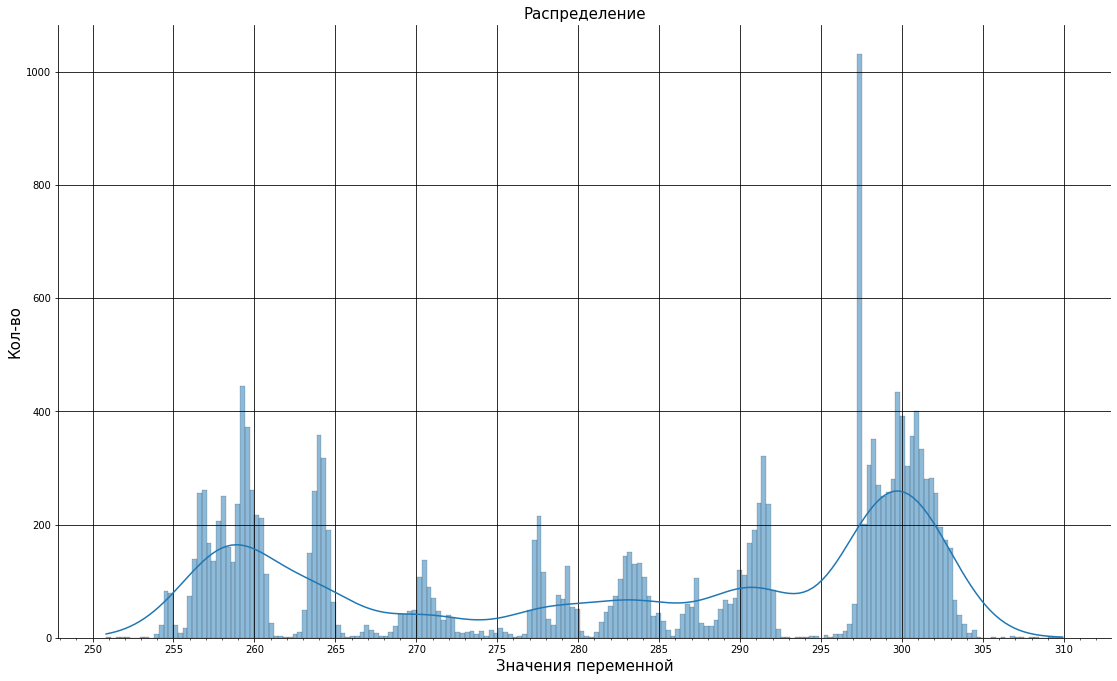

In [ ]:
dist_plot(industry_data, 250, 310, 'title_loading', 5, 1)     

/сделать дискретизацию title_loading (сделать бины, много способов)

### 3. Выявление и очистка выбросов

Для определения наилучшего способа поиска и устранения выбросов будет применено несколько разных способов. Результаты будут сохранены в разных датафреймах для наглядности.

#### 3.1 Общая очистка

Сначала можно убрать явные выбросы - значения, выходящие за границы стандартного распределения на картинке выше. Без их удаления последующие методы обработки показывают плохие результаты из-за больших интервалов, содержащих выбросы.

Относительное количество выбросов

In [ ]:
outliar_high = len(industry_data.query('title_loading > 310'))
outliar_low = len(industry_data.query('title_loading < 225'))
outliar_all = outliar_high + outliar_low

print('Процент аномально больших наблюдений: {:.3%}'.format( outliar_high/len(industry_data)))
print('Процент аномально малых наблюдений: {:.3%}'.format( outliar_low/len(industry_data)))
print('Общий процент выбросов: {:.3%}'.format( outliar_all/len(industry_data)))

Процент аномально больших наблюдений: 0.089%
Процент аномально малых наблюдений: 13.254%
Общий процент выбросов: 13.343%


Нахождение амплитуды колебаний

In [ ]:
title_amplitude = industry_data['title_loading'].loc[(industry_data.loc[:, 'timestamp'] > '2020-11-21 14:00:00'
) & (industry_data.loc[:, 'timestamp'] < '2020-11-21 17:00:00')].max() - industry_data['title_loading'].loc[(industry_data.loc[:, 'timestamp'] > '2020-11-21 14:00:00'
) & (industry_data.loc[:, 'timestamp'] < '2020-11-21 17:00:00')].min()
title_amplitude = round(title_amplitude, 1)
title_amplitude

2.0

In [ ]:
industry_data['title_loading'] = np.where(industry_data['title_loading'] < 250, 250, industry_data['title_loading'])
industry_data['title_loading'] = np.where(industry_data['title_loading'] > 310, 310, industry_data['title_loading'])
roling_median = industry_data['title_loading'].rolling(window=1000).median()
#industry_median = industry_data['title_loading'].median()

#### 3.2 Поиска и замена выбросов на основе дифференцирования

In [ ]:
def diff_smooth(data, column, iterations, window, restrict):
  for j in range(iterations):
    for i in range(len(data)):
      try:
        if ((abs(data.loc[i, column] - data.loc[i-1, column]) > restrict) & (abs(data.loc[i, column] - data.loc[i-window:i, column]).median() > restrict) 
            & (abs(data.loc[i, column] - data.loc[i:i+window, column]).median() > restrict) | (data.loc[i, column] == 250) | (data.loc[i, column] == 310)):
          data.loc[i, column] = data.loc[i-70:i-20, column].mean()
      except:
        None
  return data   

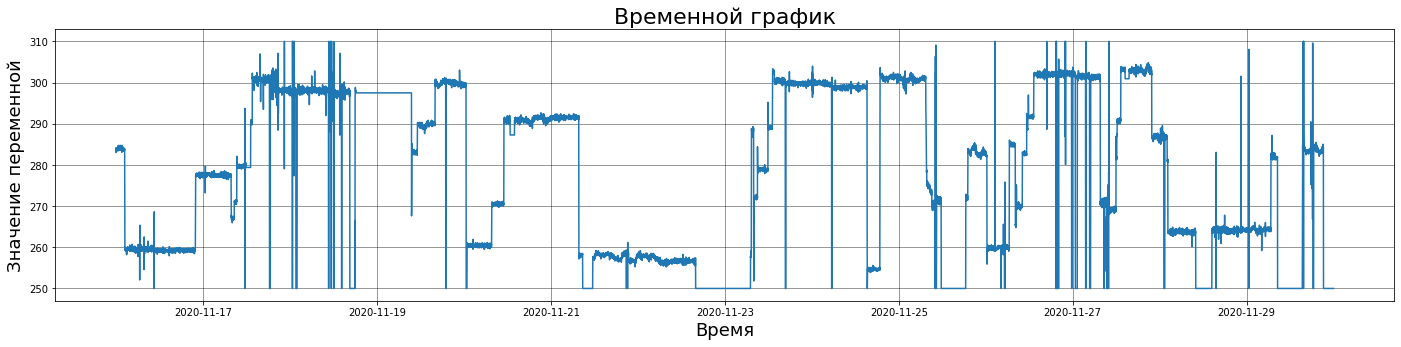

In [ ]:
time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 

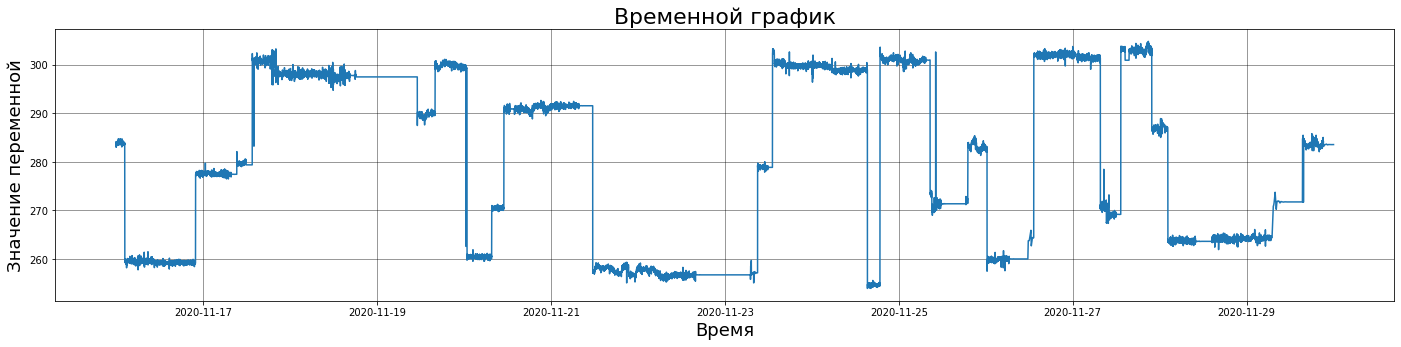

In [ ]:
diff_smooth(industry_data, 'title_loading', 2, 200, 2.5)

time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 

#### 3.2 Сглаживание

предсказание не title loading, а скользащую среднюю и её разницу. Признаки - тоже в скользящие средние и разницу.

soft labeling

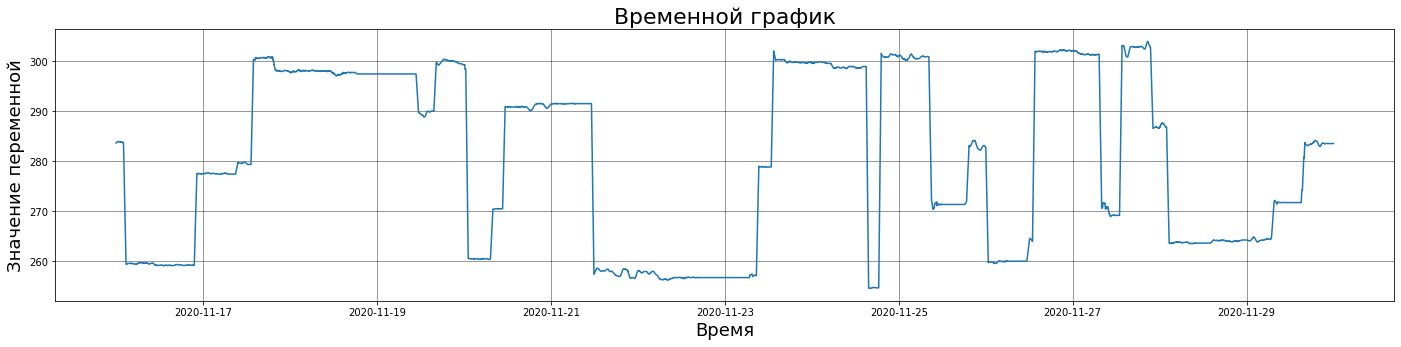

In [ ]:
industry_data['title_loading'] = pd.Series(ss.savgol_filter(industry_data['title_loading'],  41, 1, mode='interp'))

time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 

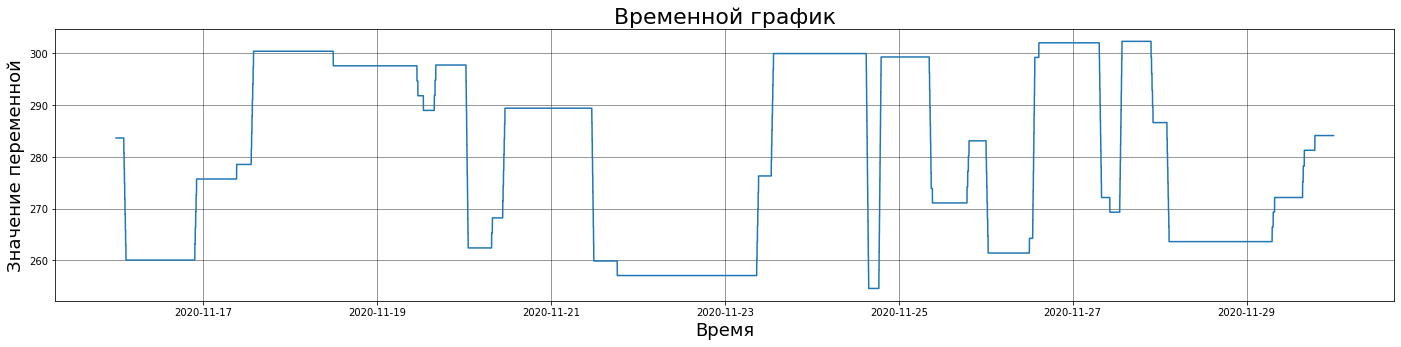

In [ ]:
for i in range(len(industry_data)):
  if i > 0:
    if abs(industry_data.loc[i, 'title_loading'] - industry_data.loc[i-1, 'title_loading']) < 2.8:
      industry_data.loc[i, 'title_loading'] = industry_data.loc[i-1, 'title_loading']

time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading') 

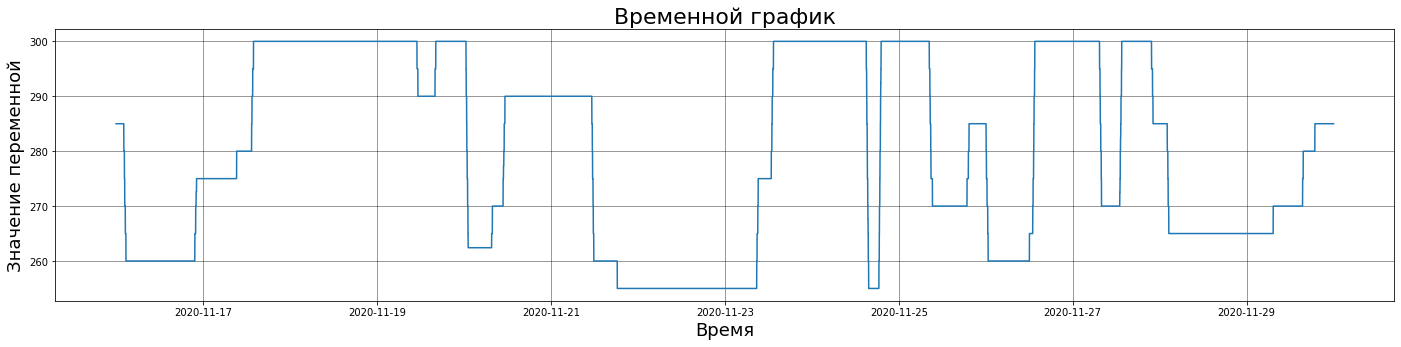

In [ ]:
round_range = range(255, 305, 5)

for i in range(len(industry_data)):
  for j in round_range:
    if abs(industry_data.loc[i, 'title_loading'] - j) < 2.4:
      industry_data.loc[i, 'title_loading'] = j

time_plot(industry_data, industry_data.loc[0, 'timestamp'], industry_data.loc[(len(industry_data)-1), 'timestamp'], 'timestamp', 'title_loading')       

In [ ]:
d = {'К-во пропусков': industry_data.isnull().sum(), 'Доля пропусков, %': industry_data.isnull().sum() / len(industry_data) * 100} 
pd.DataFrame(d)

,К-во пропусков,"Доля пропусков, %"
timestamp,0,0.0
title_loading,0,0.0
current,0,0.0
waterflow,0,0.0
t1,0,0.0
t2,0,0.0
current_s,0,0.0
amper,0,0.0
t3,0,0.0
granula,0,0.0


### 4. Метрики качества

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def weighted_average_percentage_error(y_true, y_pred): 
    return np.sum(np.abs((y_true - y_pred))) / np.sum(np.abs(y_true)) * 100    

In [ ]:
def regression_report(y_true, y_pred, model_name):
  print(model_name + 'results:')
  print()
  print('MAPE:', mean_absolute_percentage_error(y_true, y_pred))   
  print('WAPE:', weighted_average_percentage_error(y_true, y_pred))
  print('MSE:', mean_squared_error(y_true, y_pred))
  print('MAE:', mean_absolute_error(y_true, y_pred))

### 5. Создание базовой модели
С результатами этой модели будет производиться сравнение остальных. Будут созданы две базовые модели - константная и модель линейной регрессии. 

Деление на выборки

In [ ]:
industry_features = industry_data.drop(['title_loading', 'timestamp'], axis=1)
industry_target = industry_data['title_loading']

X_train, X_valid, y_train, y_valid = train_test_split(industry_features, industry_target, shuffle=False, test_size=0.2)

Тестовые данные

In [ ]:
industry_data_new = pd.read_csv('new_sample.csv')
industry_data_new['timestamp'] = pd.to_datetime(industry_data_new['timestamp'], format='%Y%m%d %H:%M:%S')
industry_data_new.head()

,timestamp,title_loading,current,waterflow,t1,t2,current_s,amper,t3,granula
0,2020-12-14 00:00:02,261.111115,461.530090,124.131943,2.893518,6.076389,515.302368,70.312500,1.302083,27.926363
1,2020-12-14 00:00:04,261.458344,325.504059,123.697914,2.893518,6.076389,531.828064,70.312500,1.302083,27.906515
2,2020-12-14 00:00:06,259.722229,561.429993,124.131943,2.893518,7.089120,529.812683,69.791664,1.302083,26.684466
3,2020-12-14 00:00:08,257.638885,586.865723,124.276619,2.893518,6.076389,510.716980,68.750000,1.302083,24.135457
4,2020-12-14 00:00:10,256.597229,589.814819,123.987267,3.038194,7.089120,494.121521,69.444443,1.302083,23.222464


In [ ]:
d = {'К-во пропусков': industry_data_new.isnull().sum(), 'Доля пропусков, %': industry_data_new.isnull().sum() / len(industry_data_new) * 100} 
pd.DataFrame(d)

,К-во пропусков,"Доля пропусков, %"
timestamp,0,0.0
title_loading,0,0.0
current,0,0.0
waterflow,0,0.0
t1,0,0.0
t2,0,0.0
current_s,0,0.0
amper,0,0.0
t3,0,0.0
granula,0,0.0


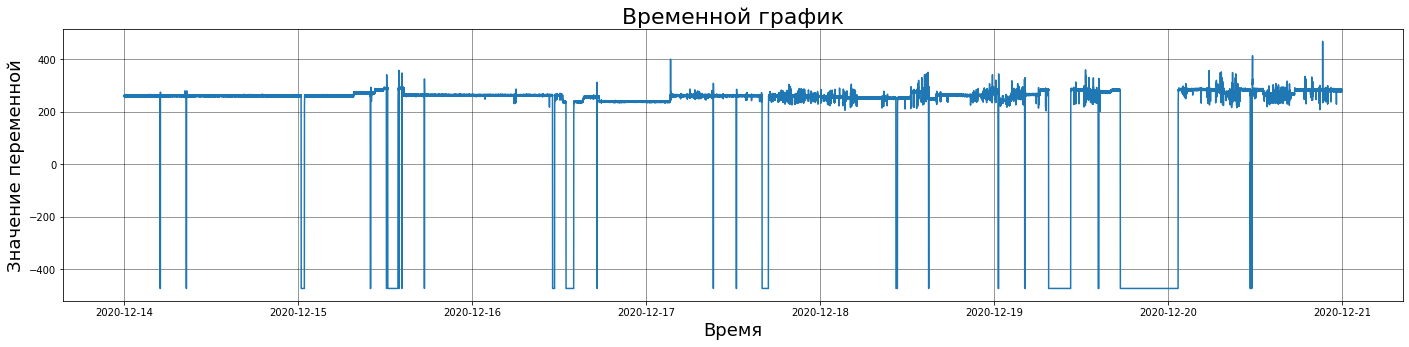

In [ ]:
time_plot(industry_data_new, industry_data_new.loc[0, 'timestamp'], industry_data_new.loc[(len(industry_data_new)-1), 'timestamp'], 'timestamp', 'title_loading')

In [ ]:
X_test = industry_data_new.drop(['title_loading', 'timestamp'], axis=1)
y_test = industry_data_new['title_loading']

**Модель скользящего среднего**

In [ ]:
def const_pred(train, test):
  pred_median = np.ones(test.shape) * train.median()
  return pred_median

In [ ]:
const_predictions_val = const_pred(y_train, y_valid)
regression_report(y_valid, const_predictions_val, 'Constant model validation')
print()
const_predictions_test = const_pred(y_train, y_test)
regression_report(y_test, const_predictions_test, 'Constant model test')

Constant model validationresults:

MAPE: 6.538140507757043
WAPE: 6.411854838879975
MSE: 374.114376632574
MAE: 17.672432426832763

Constant model testresults:

MAPE: 26.77733536652059
WAPE: 34.82419454473876
MSE: 56812.16316161775
MAE: 98.42011274127711


**Линейная модель**

In [ ]:
Baseline_ln = LinearRegression()
Baseline_ln.fit(X_train, y_train)

regression_report(y_valid, Baseline_ln.predict(X_valid), 'Baseline linear regression validation ')
print()
regression_report(y_test, Baseline_ln.predict(X_test), 'Baseline linear regression test ')

Baseline linear regression validation results:

MAPE: 3.9160420513610634
WAPE: 3.8941580564889797
MSE: 173.49280057947834
MAE: 10.733125880424527

Baseline linear regression test results:

MAPE: 28.177120016473285
WAPE: 35.912919967557734
MSE: 54294.94516323748
MAE: 101.49706772211604


Обыкновенная модель линейной регрессии показывает значительно лучший результат, чем константная. Но также склонна к переобучению.

### 6. Создание пайплайна с новыми признаками

#### 6.1 Вычисление скользящих разниц

In [ ]:
display(industry_data.loc[len(industry_data)-1,'timestamp'])
display(industry_data_new.loc[0,'timestamp'])

Timestamp('2020-11-29 23:59:00')

Timestamp('2020-12-14 00:00:02')

In [ ]:
shift_data = industry_data - industry_data.shift(fill_value=0)
shift_data_new = industry_data_new - industry_data_new.shift(fill_value=0)

shift_data.columns = shift_data.columns.map(lambda x: x+'_diff')
shift_data_new.columns = shift_data_new.columns.map(lambda x: x+'_diff')

display(shift_data.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  


,timestamp_diff,title_loading_diff,current_diff,waterflow_diff,t1_diff,t2_diff,current_s_diff,amper_diff,t3_diff,granula_diff
0,18582 days 00:00:00,285.0,481.768111,123.591818,9.428048,6.095679,490.432954,67.910877,1.173322,23.666863
1,0 days 00:01:00,0.0,75.029355,0.077161,0.443673,0.053048,50.429526,0.538194,-0.001447,1.334142
2,0 days 00:01:00,0.0,-5.197746,0.043403,0.467785,0.241127,9.079036,0.300926,0.001447,-9.153197
3,0 days 00:01:00,0.0,-92.330593,-0.033758,0.294174,-0.067516,-56.182292,-0.138889,0.041956,8.852646
4,0 days 00:01:00,0.0,61.389895,0.038580,0.067515,0.024113,14.849277,-0.133102,-0.059317,0.544110


In [ ]:
mean_data = industry_data.rolling(window=100).mean().bfill(axis = 0, limit=100) 
mean_data_new = industry_data_new.rolling(window=100).mean().bfill(axis = 0, limit=100) 

mean_data.columns = mean_data.columns.map(lambda x: x+'_mean')
mean_data_new.columns = mean_data_new.columns.map(lambda x: x+'_mean')

display(mean_data.head())

,title_loading_mean,current_mean,waterflow_mean,t1_mean,t2_mean,current_s_mean,amper_mean,t3_mean,granula_mean
0,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
1,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
2,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
3,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
4,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284


In [ ]:
complete_data = shift_data.join(mean_data)
complete_data_new = shift_data_new.join(mean_data_new)

complete_data = complete_data.drop(index=[0], axis=1).reset_index()
complete_data_new = complete_data_new.drop(index=[0], axis=1).reset_index()

display(complete_data.head())
display(complete_data_new.head())

,index,timestamp_diff,title_loading_diff,current_diff,waterflow_diff,t1_diff,t2_diff,current_s_diff,amper_diff,t3_diff,granula_diff,title_loading_mean,current_mean,waterflow_mean,t1_mean,t2_mean,current_s_mean,amper_mean,t3_mean,granula_mean
0,1,0 days 00:01:00,0.0,75.029355,0.077161,0.443673,0.053048,50.429526,0.538194,-0.001447,1.334142,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
1,2,0 days 00:01:00,0.0,-5.197746,0.043403,0.467785,0.241127,9.079036,0.300926,0.001447,-9.153197,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
2,3,0 days 00:01:00,0.0,-92.330593,-0.033758,0.294174,-0.067516,-56.182292,-0.138889,0.041956,8.852646,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
3,4,0 days 00:01:00,0.0,61.389895,0.038580,0.067515,0.024113,14.849277,-0.133102,-0.059317,0.544110,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284
4,5,0 days 00:01:00,0.0,10.776406,0.043403,-0.405092,-0.057870,40.107324,-0.445602,0.013021,1.553128,285.0,515.921209,123.63093,9.907022,6.288436,516.477529,68.508331,1.19252,23.409284


,index,timestamp_diff,title_loading_diff,current_diff,waterflow_diff,t1_diff,t2_diff,current_s_diff,amper_diff,t3_diff,granula_diff,title_loading_mean,current_mean,waterflow_mean,t1_mean,t2_mean,current_s_mean,amper_mean,t3_mean,granula_mean
0,1,0 days 00:00:02,0.347229,-136.026031,-0.434029,0.000000,0.000000,16.525696,0.000000,0.0,-0.019848,258.962959,556.331758,123.938077,3.078704,6.491609,538.324124,69.960067,1.298611,24.881758
1,2,0 days 00:00:02,-1.736115,235.925934,0.434029,0.000000,1.012732,-2.015381,-0.520836,0.0,-1.222050,258.962959,556.331758,123.938077,3.078704,6.491609,538.324124,69.960067,1.298611,24.881758
2,3,0 days 00:00:02,-2.083344,25.435730,0.144676,0.000000,-1.012732,-19.095703,-1.041664,0.0,-2.549009,258.962959,556.331758,123.938077,3.078704,6.491609,538.324124,69.960067,1.298611,24.881758
3,4,0 days 00:00:02,-1.041656,2.949097,-0.289352,0.144676,1.012732,-16.595459,0.694443,0.0,-0.912993,258.962959,556.331758,123.938077,3.078704,6.491609,538.324124,69.960067,1.298611,24.881758
4,5,0 days 00:00:02,-0.115753,-46.447937,0.000000,-0.144676,-0.144676,4.050415,0.173607,0.0,-0.669150,258.962959,556.331758,123.938077,3.078704,6.491609,538.324124,69.960067,1.298611,24.881758


Создание подвыборок для обучения и валидации

In [ ]:
complete_features = complete_data.drop(['title_loading_diff', 'title_loading_mean', 'timestamp_diff', 'index'], axis=1)
complete_target = complete_data[['title_loading_diff', 'title_loading_mean']]

In [ ]:
X_train_complete, X_valid_complete, y_train_complete, y_valid_complete = train_test_split(complete_features, complete_target, shuffle=False, test_size=0.2)

Тестирующая подвыборка

In [ ]:
X_test_complete = complete_data_new.drop(['title_loading_diff', 'title_loading_mean', 'timestamp_diff', 'index'], axis=1)
y_test_complete = complete_data_new[['title_loading_diff', 'title_loading_mean']] ##посчитать скользящее среднее по 100 точкам, предсказать для diff - перейти к реальным значениям.

#### 6.2 Создание пайплайна для новых признаков

Линейная регрессия

In [ ]:
linear_pipe = Pipeline([('scaler', RobustScaler()), ('linear regression', LinearRegression())])
linear_pipe.fit(X_train_complete, y_train_complete)

Pipeline(memory=None,
         steps=[('scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linear regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y_pred_valid = pd.DataFrame(linear_pipe.predict(X_valid_complete))
y_pred_test = pd.DataFrame(linear_pipe.predict(X_test_complete))

In [ ]:
def regression_report_diff(y_pred, y_true, model_name):
  print(model_name + ' results:')
  print()
  col_list = ['difference', 'mean']

  for i,j in zip(range(y_pred.shape[1]), col_list):
    print(j)
    print(y_valid_complete.columns[i]+'_quality')
    print('MAPE:', mean_absolute_percentage_error(y_true.iloc[:,i], y_pred[i]))   
    print('WAPE:', weighted_average_percentage_error(y_true.iloc[:,i], y_pred[i]))
    print('MSE:', mean_squared_error(y_true.iloc[:,i], y_pred[i]))
    print('MAE:', mean_absolute_error(y_true.iloc[:,i], y_pred[i]))
    print()

In [ ]:
regression_report_diff(y_pred_test, y_test_complete, 'Linear regression')

Linear regression results:

difference
title_loading_diff_quality
MAPE: inf
WAPE: 100.83264639525493
MSE: 78.91152528551122
MAE: 1.2205396049497068

mean
title_loading_mean_quality
MAPE: 33.40420657475253
WAPE: 35.43928165840334
MSE: 52865.57250474875
MAE: 99.34690426844003



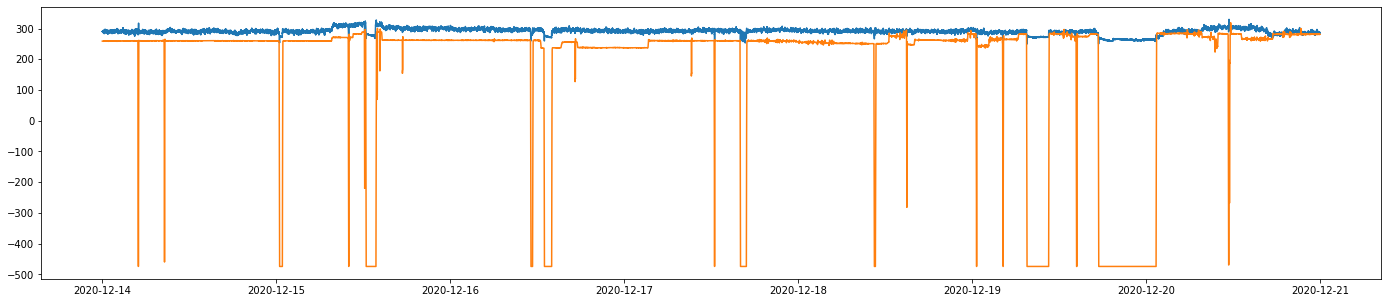

In [ ]:
#y_test_complete_cl = y_test_complete.query('title_loading_mean > 230 and title_loading_mean < 340')

plt.figure(figsize=(24, 5))

plt.plot(industry_data_new.loc[y_test_complete.index[0]:y_test_complete.index[len(y_test_complete)-1], 'timestamp'], y_pred_test[1])
plt.plot(industry_data_new.loc[y_test_complete.index[0]:y_test_complete.index[len(y_test_complete)-1], 'timestamp'], y_test_complete.iloc[:,1])

plt.show()

LGBM Boosting

In [ ]:
lgbm_pipeline = Pipeline([('LGBM', LGBMRegressor(boosting_type="gbdt",
    objective='regression',
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01))])

In [ ]:
lgbm_pipeline.fit(X_train_complete, y_train_complete['title_loading_diff'])
pred_test_diff = pd.Series(lgbm_pipeline.predict(X_test_complete))

lgbm_pipeline.fit(X_train_complete, y_train_complete['title_loading_mean'])
pred_test_mean = pd.Series(lgbm_pipeline.predict(X_test_complete))


In [ ]:
pred_test_lgbm = pd.concat([pred_test_diff, pred_test_mean], axis=1)

In [ ]:
regression_report_diff(pred_test_lgbm, y_test_complete, 'LGBM regression')

LGBM regression results:

difference
title_loading_diff_quality
MAPE: inf
WAPE: 101.50330486246327
MSE: 78.91667108657404
MAE: 1.2286576624428518

mean
title_loading_mean_quality
MAPE: 30.251784827727967
WAPE: 32.90948523936837
MSE: 54214.92738577317
MAE: 92.25512839433976



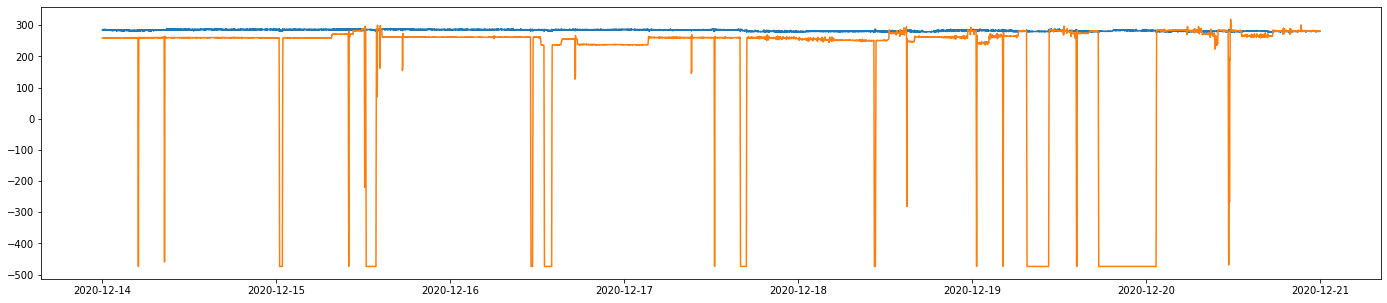

In [ ]:
plt.figure(figsize=(24, 5))

plt.plot(industry_data_new.loc[y_test_complete.index[0]:y_test_complete.index[len(y_test_complete)-1], 'timestamp'], pred_test_lgbm[1])
plt.plot(industry_data_new.loc[y_test_complete.index[0]:y_test_complete.index[len(y_test_complete)-1], 'timestamp'], y_test_complete.iloc[:,1])

plt.show()

#### 6.2 Улучшение модели библиотекой tsfresh

Генерировать признаки отдельно для обучающей и валидационной выборке.

#### 4.1 Генерация признаков

In [ ]:
tsfresh_data = industry_data_Z_value.drop(['timestamp', 'title_loading_Rolling_Average', 'title_loading_Rolling_StDev', 'title_loading_Low_Pass_Filter_Anomaly'], axis=1)
tsfresh_data.head()
tsfresh_data.shape

NameError: ignored

In [ ]:
settings_minimal = settings.MinimalFCParameters()
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_minimal)
settings_time

In [ ]:
data_long = pd.DataFrame({0: tsfresh_data.values.flatten(),
                          1: np.arange(tsfresh_data.shape[0]).repeat(tsfresh_data.shape[1])})
print(data_long.shape)
data_long.head(20)

In [ ]:
extracted_features = extract_features(data_long, column_id=1)

In [ ]:
extracted_features.shape

#### 4.2 Отбор признаков

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, tsfresh_data['title_loading'])

In [ ]:
features_filtered.shape

In [ ]:
#transformer = RobustScaler().fit(tsfresh_data)
#transformer.transform(tsfresh_data)
#display(industry_data_Z_value.head())
#tsfresh_data.head()

In [ ]:
featured_data = tsfresh_data.join(features_filtered)
featured_data.head()

In [ ]:
featured_data.isna().sum()

#### 4.3 Обучение модели с новыми признаками

In [ ]:
complete_industry_features = featured_data.drop(['title_loading'], axis=1)
complete_industry_target = featured_data['title_loading']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(complete_industry_features, complete_industry_target, shuffle=False, test_size=0.3)

In [ ]:
X_train_all.head()

In [ ]:
linear_complete = LinearRegression()
linear_complete.fit(X_train_all, y_train_all)
linear_predict = linear_complete.predict(X_test_all)

regression_report(y_test_all, linear_predict, 'Tsfresh linear regression')

In [ ]:
y_test_all.plot()
plt.show()
pd.Series(linear_predict).plot()

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.2, 0.15, 0.01]:
        plt.plot(exponential_smoothing(industry_data['title_loading'], alpha), label="Alpha {}".format(alpha))
    plt.plot(industry_data['title_loading'].values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)    

Лучше всего сглаживает ряд наименьший коэффициент alpha = 0.01. Остальные коэффициенты слабо влияют на сглаживание. Фактор сглаживания очень низкий, предыдущие значения оказывают большое влияние на ряд.

In [ ]:
industry_data['title_loading'] = exponential_smoothing(industry_data['title_loading'], 0.01)
industry_data['title_loading'].plot(figsize=(20, 5))

### 2. Генерация признаков

### 3. Создание пайплайна

#### Pipelines Creation:
1. Предобработка данных с RobustScaler
2. Извлечение и отбор признаков используя tsfresh 
3. Применение  LinearRegression

In [ ]:
settings_minimal = settings.MinimalFCParameters()
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_minimal)
settings_time

In [ ]:
X = extract_features(industry_data, column_id=industry_data., impute_function=impute, default_fc_parameters=settings_time)
print(X.shape)

In [ ]:
pipeline_lr = Pipeline([('scaler', RobustScaler()), ('augmenter', RelevantFeatureAugmenter(column_id=tsfresh_data.index, column_sort=None)), ('regressor', LinearRegression())])

In [ ]:
pipeline_lr.set_params(augmenter__timeseries_container=tsfresh_data);

In [ ]:
pipeline_lr.fit(X_train, y_train)

In [ ]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['PJME_MW'].shift(lag)

    data['rolling_mean'] = data['PJME_MW'].shift().rolling(rolling_mean_size).mean()